# Investigate effect of backprop

In [1]:
import os
import pandas as pd

In [2]:
experiments_dir = "../experiments_backprop_improvement/"
files = [f for f in os.listdir(experiments_dir) if os.path.isfile(experiments_dir + f)]
data = []
for i, f in enumerate(files):
    data.append(pd.read_csv(experiments_dir + f))

In [3]:
k = []
zeros = []


for i in range(20):
    zeros.append([])
    k.append([])
    for d in data:
        gen_i = d[d["generation"] == i]
        k[i].append(gen_i)
        zeros[i].append(gen_i[gen_i["diff_after_backprop"] == 0].shape[0])
    k[i] = pd.concat(k[i])

Proportion of trees which did not improve each generation through backprop


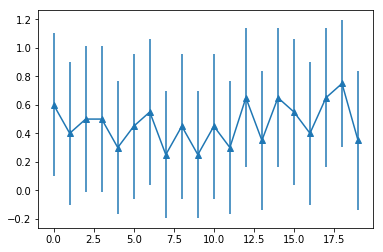

In [6]:
from statistics import mean, stdev, median
from plot import errorbar_plot

values = [(i, (mean(z)/512, stdev(z)/512)) for i, z in enumerate(zeros)]

print("Proportion of trees which did not improve each generation through backprop")
errorbar_plot(values)

Mean value of improvement


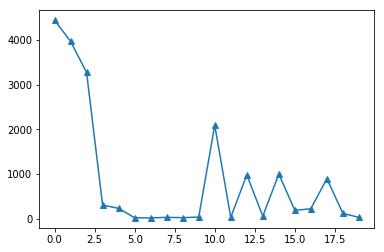

In [15]:
from statistics import mean, stdev, median
from plot import errorbar_plot

values = [(i, (z["diff_after_backprop"].mean(), 0)) for i, z in enumerate(k)]

print("Mean value of improvement")
errorbar_plot(values)

In [8]:
k[19].sort_values(by=['current_fitness'])

,generation,individual,diff_after_backprop,backprop_iterations,total_backprop_improvement,current_fitness,generations_alive,created_by
9876,19,148,0.000000,1,0.000000,3388.432944,1,SubtreeCrossover
9821,19,93,0.000000,1,0.000000,3388.432944,1,SubtreeCrossover
9904,19,176,0.000000,1,0.000000,3388.432944,1,SubtreeCrossover
10063,19,335,0.000000,1,0.000000,3388.432944,1,SubtreeCrossover
10028,19,300,0.000000,1,0.000000,3388.432944,1,SubtreeCrossover
9795,19,67,0.000000,1,0.000000,3388.432944,1,SubtreeCrossover
9986,19,258,0.000000,1,0.000000,3388.432944,1,SubtreeCrossover
10202,19,474,0.000000,1,0.000000,3749.437424,1,SubtreeCrossover
10099,19,371,0.000000,10,103.248313,3759.196272,1,SubtreeCrossover
10065,19,337,0.000000,10,103.248313,3759.196272,1,SubtreeCrossover


In [9]:
df = k[19].sort_values(by=['current_fitness']).head(51)

df.groupby('backprop_iterations').count()["current_fitness"]

backprop_iterations
1      8
10    26
30    17
Name: current_fitness, dtype: int64

In [10]:
df = k[19].sort_values(by=['current_fitness']).head(51)

df.groupby('generations_alive').count()["current_fitness"]

generations_alive
1    34
3    17
Name: current_fitness, dtype: int64

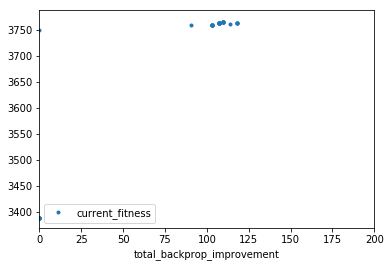

In [11]:
df = k[19].sort_values(by=['current_fitness']).head(51)

df.plot(x='total_backprop_improvement', y='current_fitness', style=".", xlim=(0,200))

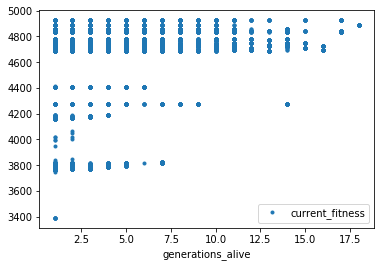

In [12]:
df = k[19].sort_values(by=['current_fitness'])

df.plot(x='generations_alive', y='current_fitness', style=".")

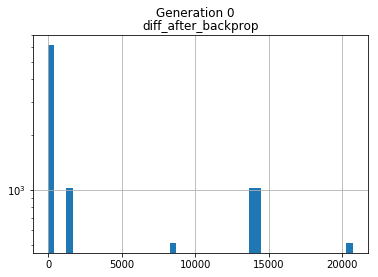

6144


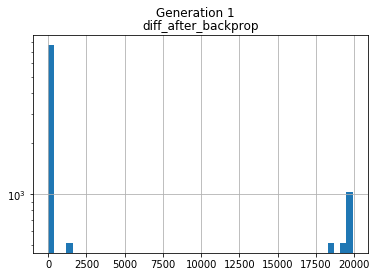

4096


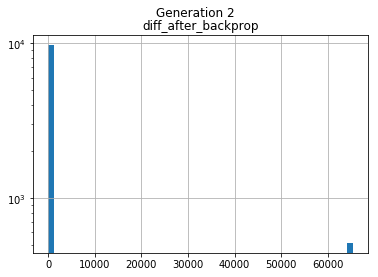

5120


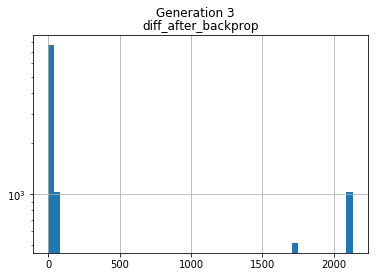

5120


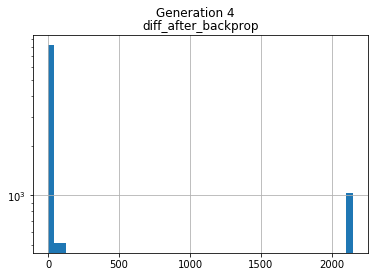

3072


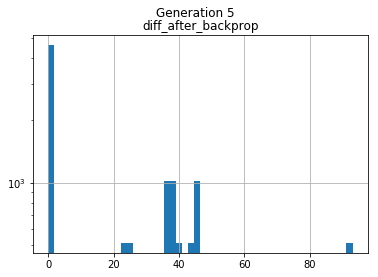

4608


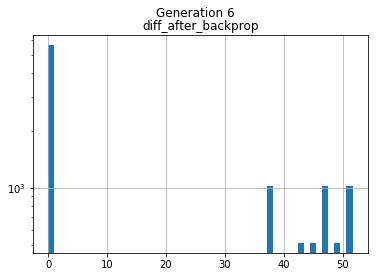

5632


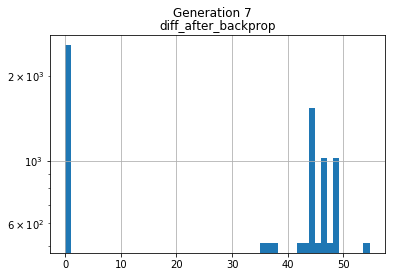

2560


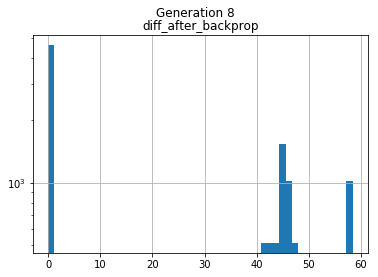

4608


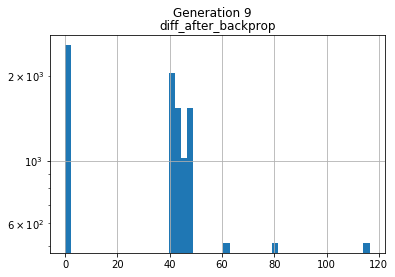

2560


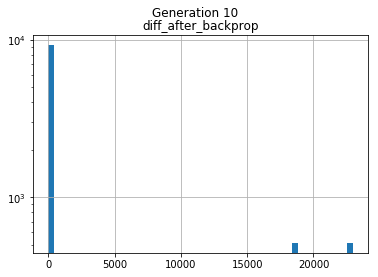

4608


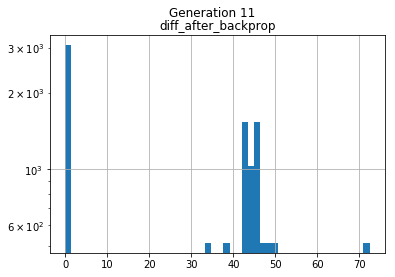

3072


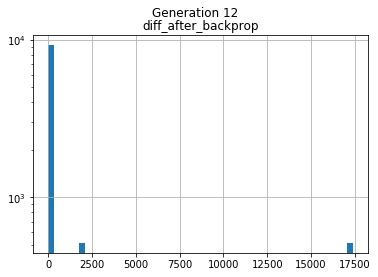

6656


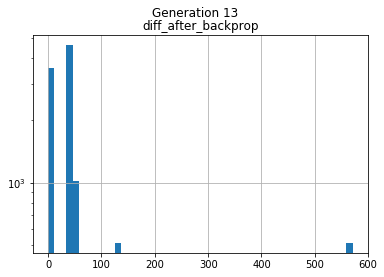

3584


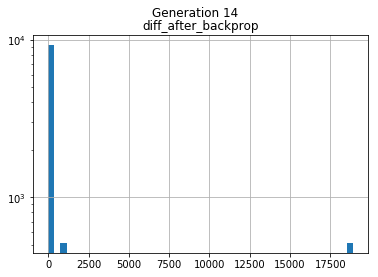

6656


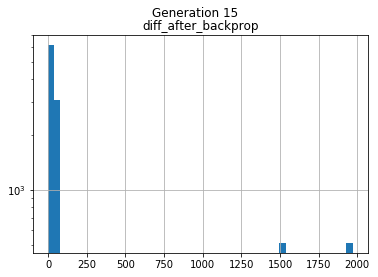

5632


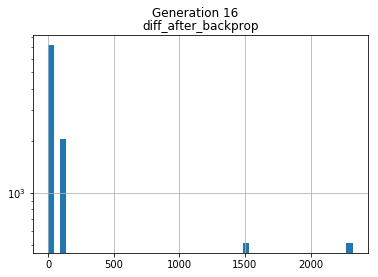

4096


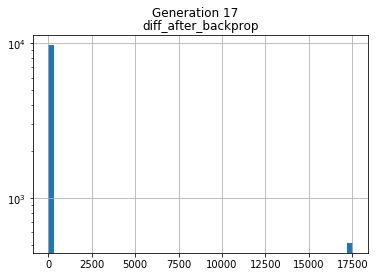

6656


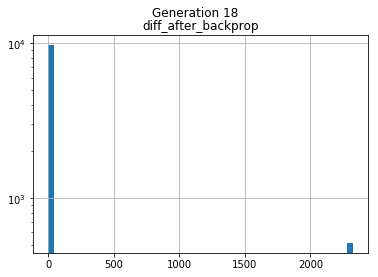

7680


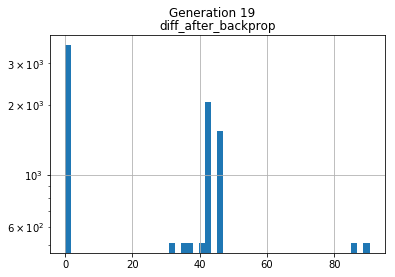

3584


In [14]:
import matplotlib.pyplot as plt
import pylab as pl

for i in range(len(k)):    
    df = k[i][k[i]["diff_after_backprop"] >= 0]
    p = df.hist(column="diff_after_backprop", log=True, bins=50)
    pl.suptitle("Generation " + str(i))
    plt.show()
    
    print((df["diff_after_backprop"]==0).astype(int).sum())